In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("spam.csv", encoding_errors="ignore")

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1034,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...,NaN,NaN,NaN
2405,ham,I'm meeting Darren...,NaN,NaN,NaN
1446,ham,Looks like u wil b getting a headstart im leav...,NaN,NaN,NaN
5350,ham,No one interested. May be some business plan.,NaN,NaN,NaN
1103,ham,Aiyah sorry lor... I watch tv watch until i fo...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# drop last 3 column since it doesnt have munch data and almost empty

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Rename Column

In [9]:
df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace = True)

### encoding the name ham and spam as o, 1

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# duplicate values
df.duplicated().sum()

np.int64(404)

In [14]:
# remove duplicate
df.drop_duplicates(keep = 'first', inplace=True)

# EDA

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [17]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x20550391fd0>,
 [Text(-1.014725450968414, 0.42465545935140026, 'ham'),
  Text(1.0147253868472121, -0.42465561257067574, 'spam')],
 [Text(-0.5534866096191349, 0.2316302505553092, '87.38'),
  Text(0.5534865746439338, -0.23163033412945946, '12.62')])

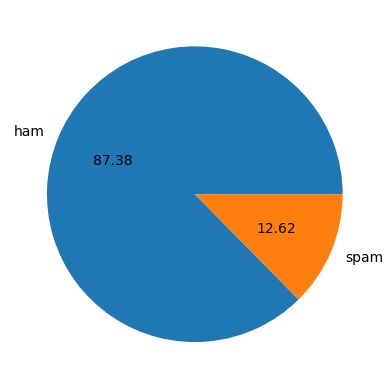

In [18]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')

# Data is imbalance we having more ham messages than spam

In [19]:
import nltk

# adding feature like counts of chars, word and sentences

In [20]:
df['num_char'] = df['text'].apply(len)

In [21]:
df

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159
5568,0,Will _ b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [22]:
# words counts
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
# sentence counts
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,0,Will _ b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [25]:
df.describe()

,target,num_char,num_words,num_sent
count,5168.000000,5168.000000,5168.000000,5168.000000
mean,0.126161,78.759481,18.441176,1.966331
std,0.332063,58.104099,13.327587,1.449367
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,116.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [26]:
# ham messages
df[df['target'] == 0].describe()

,target,num_char,num_words,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.344110,17.108946,1.819973
std,0.0,56.328803,13.494730,1.383228
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [27]:
# spam messages
df[df['target'] == 1].describe()

,target,num_char,num_words,num_sent
count,652.0,652.000000,652.000000,652.000000
mean,1.0,137.047546,27.668712,2.980061
std,0.0,29.937352,7.015283,1.491780
min,1.0,13.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,156.000000,32.000000,4.000000
max,1.0,222.000000,46.000000,9.000000


# mean of no of counts for ham messages is 70 and for spam is 137 that shows spam are usually larges messages

In [28]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

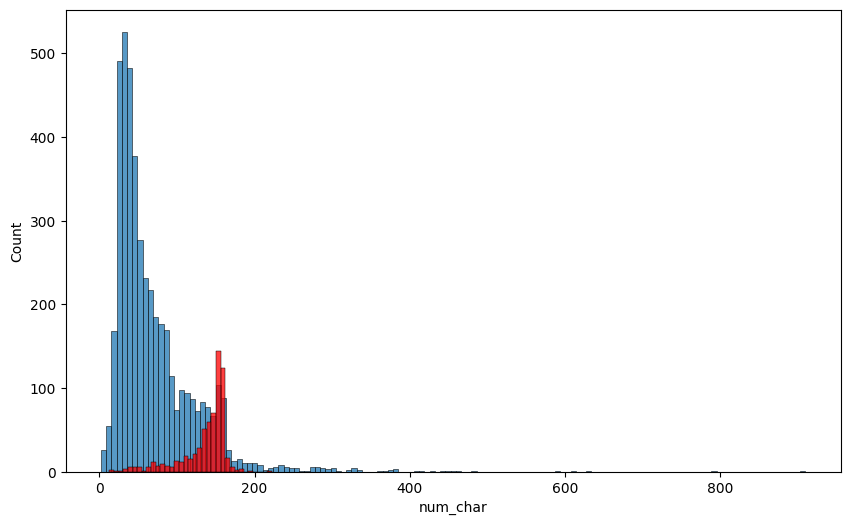

In [29]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['target'] == 0] ['num_char'])
sns.histplot(df[df['target'] == 1] ['num_char'], color ="red")

<Axes: xlabel='num_words', ylabel='Count'>

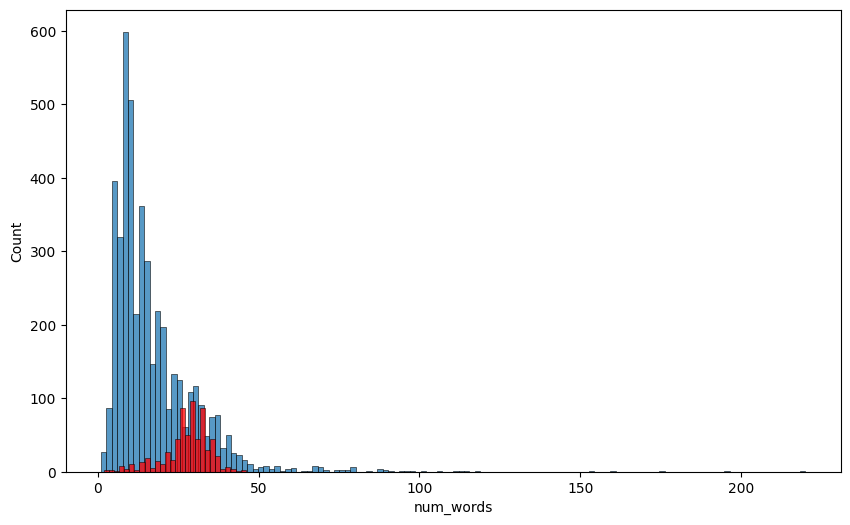

In [30]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['target'] == 0] ['num_words'])
sns.histplot(df[df['target'] == 1] ['num_words'], color ="red")

# chart clearly shows no of ham messsages usualy have less characters and less words compare to spam messages

# lest see the correlation that will show relationship between these columns

<Axes: >

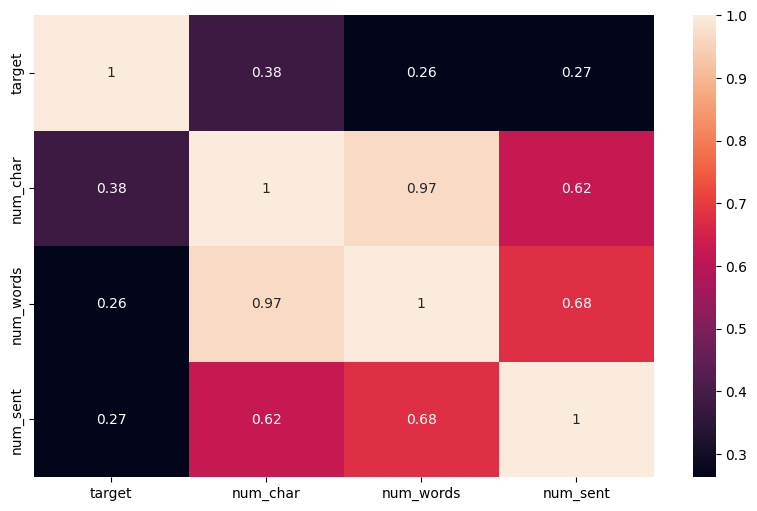

In [31]:
plt.figure(figsize = (10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# we have num_char and num_words with high correlation that show multicolanirity ! 

# Data Preprocessing

## removing special characters and converting to lower case

In [32]:
# import string and  stopwords from nltk 
from nltk.corpus import stopwords
import string as str
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
def tranform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    # remove special characters 
    for i in text:
        if i.isalnum():
            y.append(i)

    # remove stop words and puntuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in str.punctuation:
            y.append(i)

    # using stemming to convert all words into their root formn
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [34]:
text = "Hi How Are You ajay?"
tranform_text(text)

'hi ajay'

In [35]:
df['transformed_text'] = df['text'].apply(tranform_text)

In [36]:
df

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4,2nd time tri 2 contact u 750 pound prize 2 cla...
5568,0,Will _ b going to esplanade fr home?,36,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## import wordcloud to visualize the mosty frequent words in spam and ham

In [37]:
from wordcloud import WordCloud

In [38]:
wc = WordCloud( width=600, height=600, min_font_size=10, background_color='white' )

# for spam

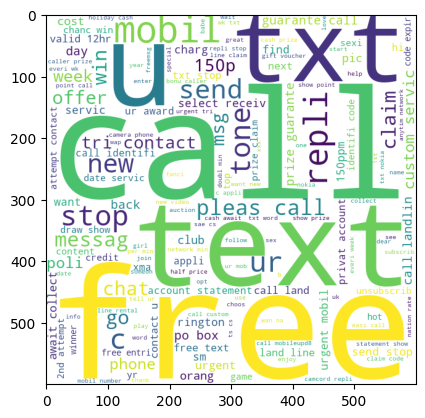

In [39]:
spam_wc = wc.generate(df[df['target'] == 1] ['transformed_text'].str.cat(sep=" ") )
plt.imshow(spam_wc)

# for ham

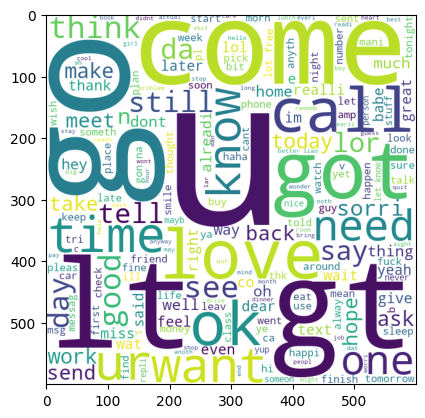

In [41]:
ham_wc = wc.generate(df[df['target'] == 0] ['transformed_text'].str.cat(sep=" ") )
plt.imshow(ham_wc)

# Model Building 

In [43]:
# Text Ventorization
